1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)


In [56]:
import numpy as np

In [57]:
import pandas as pd

1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [58]:
bt = pd.read_csv("/Users/mac/Downloads/batting.csv")

2) Print out the dimensions and info about the dataframe you just created


In [59]:
bt.shape

(102816, 25)

In [60]:
bt.info

<bound method DataFrame.info of          playerID  nameFirst     nameLast  birthYear  yearID  stint teamID  \
0       abercda01      Frank  Abercrombie       1850    1871      1    TRO   
1        addybo01        Bob         Addy       1842    1871      1    RC1   
2       allisar01        Art      Allison       1849    1871      1    CL1   
3       allisdo01       Doug      Allison       1846    1871      1    WS3   
4       ansonca01        Cap        Anson       1852    1871      1    RC1   
5       armstbo01     Robert    Armstrong       1850    1871      1    FW1   
6       barkeal01         Al       Barker       1839    1871      1    RC1   
7       barnero01       Ross       Barnes       1850    1871      1    BS1   
8       barrebi01       Bill      Barrett          0    1871      1    FW1   
9       barrofr01      Frank      Barrows       1844    1871      1    BS1   
10       bassjo01       John         Bass       1848    1871      1    CL1   
11      battijo01        Joe    

3)	How many players have hit 40 or more HRs in one single season? (Number only)


In [61]:
bt3=bt.groupby(['playerID','yearID'],as_index=False).agg({'HR':sum})
###bt[bt["HR"]>=40]['playerID'].count()----some players occur several times

In [62]:
bt3[bt3['HR']>=40]['playerID'].nunique()

142

4)	How many players have hit more than 600 HRs for their career? (Dataframe)


In [63]:
bt4 = bt.groupby('playerID').agg({'HR':sum})
bt4[bt4['HR']>600] 

#bt1 = bt.groupby('playerID')[['HR']].sum()
#bt1[bt1['HR']>600].count()   
#The above are codes for Number not dataframe 
#add one more [] on HR made HR as a column name as the new chart

,HR
playerID,
aaronha01,755
bondsba01,762
griffke02,630
mayswi01,660
rodrial01,696
ruthba01,714
sosasa01,609
thomeji01,612


5) How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)


In [64]:
bt5=bt.groupby(['playerID','yearID'],as_index=False).agg({'2B':sum,'3B':sum,'H':sum,'HR':sum})
###bt[(bt['2B']==40)&(bt['3B']==10)&(bt.H==200)&(bt.HR==30)]['playerID'].count()
#### conditions ---add ( ) 

In [65]:
bt5[(bt5['2B']>=40)&(bt5['3B']>=10)&(bt5['H']>=200)&(bt5['HR']>=30)]['playerID'].nunique()

11

6) How many players have had 100 or more SBs in a season? (Dataframe)


In [66]:
bt6=bt.groupby(['playerID','yearID'],as_index=False).agg({'SB':sum}) 
bt6[(bt6['SB']>=100)]

##bt[bt['SB']>=100]['playerID'].count()


,playerID,yearID,SB
9713,brocklo01,1974,118.0
10331,brownpe01,1887,103.0
10364,brownto01,1891,106.0
16351,colemvi01,1985,110.0
16352,colemvi01,1986,107.0
16353,colemvi01,1987,109.0
16703,comisch01,1887,117.0
27187,fogarji01,1887,102.0
34649,hamilbi01,1889,111.0
34650,hamilbi01,1890,102.0


7)How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [67]:
bt7=bt[(bt['yearID']>=1960)&(bt['yearID']<=1969)] 
### use & connect two (condition),rather than two [condition]
bt7a=bt7.groupby(['playerID']).agg({'HR':sum})
bt7a[(bt7a['HR']>=200)] 
#bt7=bt[(bt['yearID']>=1960)]&[(bt['yearID']<=1969)].groupby(['playerID']).agg({'HR':sum}) ----condition and groupby should be wirtten separately!  
# outside the condition's () , it should have a [] #3bt[(bt['HR']>200)& (bt.yearID[1960:1969])]['playerID'].count()

,HR
playerID,
aaronha01,375
allisbo01,225
bankser01,269
cashno01,278
cepedor01,254
colavro01,245
howarfr01,288
kalinal01,210
killeha01,393


8) Who has hit the most HRs in history? (Dataframe)

In [68]:
bt8=bt.groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({"HR": sum})
### groupby for several attributes need removed more index, so as_index is needed!

In [14]:
bt8[bt8['HR']==bt8['HR'].max()]

,playerID,nameFirst,nameLast,HR
1542,bondsba01,Barry,Bonds,762


9)	Who had the most hits in the 1970s? (Dataframe)


In [15]:
bt9=bt[(bt['yearID']>=1970)&(bt['yearID']<=1979)]
bt9a=bt9.groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({"H": sum})
bt9a[bt9a['H']==bt9a['H'].max()]
#bt9[(bt9['H']==bt9['H'].max())&(bt['yearID']>=1970)&(bt['yearID']<=1979)]
# wrong，year‘s condition as a filter can not go after groupby since there is no yearid in bt9 chart anymor

,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)


In [16]:
bt['PA']= bt['AB']+bt['BB']+bt['IBB']+bt['SH']+bt['SF']
bt['OBP']= (bt['H']+bt['BB']+bt['IBB']+bt['SH']+bt['SF'])/bt['AB']
#bt10=bt[(bt['yearID']==1977)&(bt['AB']+bt['BB']+bt['IBB']+bt['SH']+bt['SF'])>=500) long code is better to seperate

In [17]:
bt10= bt[(bt['yearID']==1977)&(bt['PA']>=500)]

In [18]:
bt10.sort_values(['OBP'],ascending = False).head()
## .sort_values----top n ...
##Bank.groupby('ST').count().sort_values('Bank Name', ascending = False)
##default heade()=head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
55273,singlke01,Ken,Singleton,1947,1977,1,BAL,AL,152,536,...,1.0,107,101.0,13.0,2.0,0.0,6.0,15.0,662.0,0.563433
55280,smithre06,Reggie,Smith,1945,1977,1,LAN,NL,148,488,...,5.0,104,76.0,11.0,3.0,1.0,7.0,5.0,611.0,0.559426
55329,tenacge01,Gene,Tenace,1946,1977,1,SDN,NL,147,437,...,3.0,125,119.0,10.0,13.0,2.0,4.0,5.0,578.0,0.556064
54820,hargrmi01,Mike,Hargrove,1949,1977,1,TEX,AL,153,525,...,5.0,103,59.0,7.0,6.0,8.0,6.0,13.0,649.0,0.540952
54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,616,...,13.0,69,55.0,15.0,3.0,1.0,5.0,6.0,706.0,0.534091


11) Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [19]:
bt['average']=bt['H']/bt['AB']  #batting average= Hits／At Bats
bt['PA']= bt['AB']+bt['BB']+bt['IBB']+bt['SH']+bt['SF']

In [20]:
bt11=bt[(bt['PA']>=300)&(bt['yearID']==2013)]
bt11.sort_values(['average'],ascending=False).head(8)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
97188,cabremi01,Miguel,Cabrera,1983,2013,1,DET,AL,148,555,...,90,94.0,19.0,5.0,0.0,2.0,19.0,666.0,0.547748,0.347748
98062,ramirha01,Hanley,Ramirez,1983,2013,1,LAN,NL,86,304,...,27,52.0,3.0,3.0,0.0,2.0,5.0,336.0,0.450658,0.345395
97300,cuddymi01,Michael,Cuddyer,1979,2013,1,COL,NL,130,489,...,46,100.0,5.0,2.0,0.0,3.0,13.0,543.0,0.441718,0.331288
97825,mauerjo01,Joe,Mauer,1983,2013,1,MIN,AL,113,445,...,61,89.0,7.0,0.0,0.0,2.0,7.0,515.0,0.480899,0.323596
98293,troutmi01,Mike,Trout,1991,2013,1,LAA,AL,157,589,...,110,136.0,10.0,9.0,0.0,8.0,8.0,717.0,0.539898,0.322581
97651,johnsch05,Chris,Johnson,1984,2013,1,ATL,NL,142,514,...,29,116.0,5.0,2.0,0.0,2.0,20.0,550.0,0.391051,0.321012
97437,freemfr01,Freddie,Freeman,1989,2013,1,ATL,NL,147,551,...,66,121.0,10.0,7.0,0.0,5.0,10.0,632.0,0.466425,0.319419
98043,puigya01,Yasiel,Puig,1990,2013,1,LAN,NL,104,382,...,36,97.0,6.0,11.0,0.0,3.0,6.0,427.0,0.437173,0.319372


12)Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [55]:
bt12=bt[(bt['yearID']>=1940)& (bt['yearID']<=1949)].groupby(['yearID','playerID'],as_index=False).agg({'H':sum})

In [54]:
bt12.groupby('yearID').apply(lambda t: t[t.H==t.H.max()])  # the maximum row in each group

yearID   playerID    H
yearID                             
1940   84      1940  cramedo01  200
       305     1940  mccosba01  200
       377     1940  radclri01  200
1941   1003    1941  travice01  218
1942   1424    1942  peskyjo01  205
1943   1909    1943  musiast01  220
1944   2560    1944  stirnsn01  205
1945   2868    1945  holmeto01  224
1946   3599    1946  musiast01  228
1947   4192    1947  peskyjo01  207
1948   4700    1948  musiast01  230
1949   5233    1949  musiast01  207

13) Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)


In [ ]:
bt13=bt.groupby('yearID').apply(lambda t: t[t.H==t.H.max()])  # the maximum row in each group

In [ ]:
bt13a=bt13.groupby(['playerID','nameFirst','nameLast']).agg({'H':'count'})

In [ ]:
bt13a[bt13a.H=bt13a.H.max()]

14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [ ]:
bt14=bt.groupby(['playerID','nameFirst','nameLast'],as_index=False).agg({"G": sum})

In [ ]:
bt14.sort_values(['G'],ascending=False).head(5)

15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [160]:
bt15 = bt.groupby('playerID').agg({'HR':sum,'H':sum})
len(bt15[(bt15['H']>3000)&(bt15['HR']>=500)])
## len:count row numbers

5

16) How many HRs were hit during the entire 1988 season?  Just a number is okay here



In [161]:
bt[bt['yearID']==1988]['HR'].sum()    ## the total HRs have been hit rather than the number of observations of HRs in 1988,so count() is wrong

3180

17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [162]:
bt['average']=bt['H']/bt['AB']

In [163]:
bt17=bt.groupby(['yearID','playerID','nameFirst','nameLast'],as_index=False).agg({'AB':sum,'average':sum})

In [164]:
bt17a=bt17[(bt17['nameFirst']=='Wade')&(bt17['nameLast']=='Boggs')&(bt17['AB']>=500)]

In [165]:
bt17a.sort_values(['average'],ascending=False).head(3) ###in order to sort 'average',we have to add 'average' as a new column so we agg avergae in bt17 

,yearID,playerID,nameFirst,nameLast,AB,average
57921,1985,boggswa01,Wade,Boggs,653,0.367534
60800,1988,boggswa01,Wade,Boggs,584,0.366438
59818,1987,boggswa01,Wade,Boggs,551,0.362976


18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [132]:
bt['OBP']= (bt['H']+bt['BB']+bt['IBB']+bt['SH']+bt['SF'])/bt['AB']

In [133]:
bt['PA']= bt['AB']+bt['BB']+bt['IBB']+bt['SH']+bt['SF']

In [134]:
bt18=bt.groupby(['yearID','playerID','nameFirst','nameLast'],as_index=False).agg({'PA':sum,'OBP':sum})

In [135]:
bt18[(bt18['yearID']==1995)&(bt18['PA']>=500)].sort_values(['OBP'],ascending=False).head(1)

,yearID,playerID,nameFirst,nameLast,PA,OBP
68764,1995,seguida01,David,Segui,512.0,0.99113


19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [136]:
bt19=bt[bt['yearID'].isin([1922,1925,1926,1928])].groupby(['yearID','playerID','nameFirst','nameLast']).agg({'3B':sum})

In [137]:
bt19.max(level=0).reset_index().merge(bt19.reset_index())  ###level=0:the first level;reset_index()---make the index as a new column

,yearID,3B,playerID,nameFirst,nameLast
0,1922,22,daubeja01,Jake,Daubert
1,1925,26,cuyleki01,Kiki,Cuyler
2,1926,22,wanerpa01,Paul,Waner
3,1928,21,combsea01,Earle,Combs


20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [138]:
bt20=bt.groupby(['playerID','yearID'],as_index=False).agg({'HR':sum,'SB':sum})

In [139]:
bt20[(bt20['HR']>=30)&(bt20['SB']>=30)]['playerID'].nunique()

38

21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [140]:
bt['OBP']= (bt['H']+bt['BB']+bt['IBB']+bt['SH']+bt['SF'])/bt['AB']
bt['PA']= bt['AB']+bt['BB']+bt['IBB']+bt['SH']+bt['SF']


In [141]:
bt21=bt.groupby(['yearID','playerID','nameFirst','nameLast'],as_index=False).agg({'PA':sum,'OBP':sum})

In [142]:
bt21[(bt21['yearID']==1986)&(bt21['PA']>=400)].sort_values('OBP',ascending=False).head(1)

,yearID,playerID,nameFirst,nameLast,PA,OBP
58871,1986,bonilbo01,Bobby,Bonilla,497.0,0.843082


22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [143]:
bt['OBP']=(bt['H']+bt['BB']+bt['IBB']+bt['SH']+bt['SF'])/bt['AB']
bt['PA']= bt['AB']+bt['BB']+bt['IBB']+bt['SH']+bt['SF']


In [144]:
bt22=bt.groupby(['yearID','playerID','nameFirst','nameLast','lgID'],as_index=False).agg({'PA':sum,'OBP':sum})

In [145]:
bt22[(bt22['yearID']==1997)&(bt22['PA']>=400)&(bt22['lgID']=='NL')].sort_values('OBP',ascending=False).head(1)

,yearID,playerID,nameFirst,nameLast,lgID,PA,OBP
71117,1997,daultda01,Darren,Daulton,NL,485.0,0.965894


23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [146]:
bt23=bt.groupby(['lgID','playerID','nameFirst','nameLast','yearID'],as_index=False).agg({'HR':sum,'PA':sum})

In [147]:
mean=bt23[bt23['yearID']==2012]['HR'].mean()


In [148]:
bt23[(bt23['yearID']==2012)&(bt23['PA']<500)&(bt23['HR']> mean)]


,lgID,playerID,nameFirst,nameLast,yearID,HR,PA
2674,AL,andinro01,Robert,Andino,2012,7,429.0
2841,AL,arencjp01,J. P.,Arencibia,2012,18,370.0
3100,AL,avilaal01,Alex,Avila,2012,9,434.0
3980,AL,bautijo02,Jose,Bautista,2012,27,397.0
4790,AL,betanyu01,Yuniesky,Betancourt,2012,7,228.0
4796,AL,betemwi01,Wilson,Betemit,2012,12,375.0
5360,AL,boescbr01,Brennan,Boesch,2012,12,499.0
7574,AL,cainlo01,Lorenzo,Cain,2012,7,241.0
8023,AL,carpmi01,Mike,Carp,2012,5,187.0
8136,AL,cartech02,Chris,Carter,2012,16,261.0


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [27]:
bt['age']=bt['yearID']-bt['birthYear']

In [25]:
bt24=bt.groupby(['playerID','nameFirst','nameLast','age'],as_index=False).agg({'HR':sum})

In [31]:
bt24[bt24['HR']>=50].sort_values('age').head(1)

,playerID,nameFirst,nameLast,age,HR
26282,fieldpr01,Prince,Fielder,23,50


25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [60]:
bt25=bt.groupby(['playerID','nameFirst','nameLast','birthYear'],as_index=False).agg({'HR':sum})

In [62]:
bt25[bt25['HR']>=300].sort_values('birthYear',ascending=False).head(5)

,playerID,nameFirst,nameLast,birthYear,HR
5287,fieldpr01,Prince,Fielder,1984,319
4953,encared01,Edwin,Encarnacion,1983,310
2385,cabremi01,Miguel,Cabrera,1983,446
6329,gonzaad01,Adrian,Gonzalez,1982,308
13782,pujolal01,Albert,Pujols,1980,591


26)Graph total HRs per season using bar graph

In [16]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

In [27]:
bt26=bt.groupby('yearID',as_index=False).agg({'HR':sum})

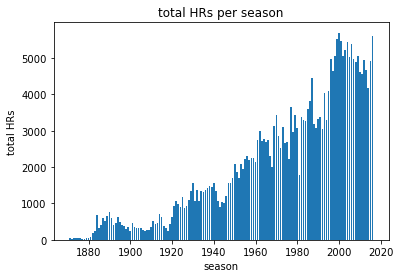

In [30]:
plt.bar(bt26['yearID'],bt26['HR'])
plt.axes().set(xlabel='seasons',ylabel='total HRs',title='total HRs per season')

27)Using a line graph please graph the average HRs per AB (think about this) per season

In [41]:
bt27=bt.groupby(['yearID','playerID'],as_index=False).agg({'HR':sum,'AB':sum})

In [44]:
bt27['HRs per AB']= bt27['HR']/bt27['AB']

In [48]:
bt27a=bt27.groupby('yearID',as_index=False)['HRs per AB'].mean()

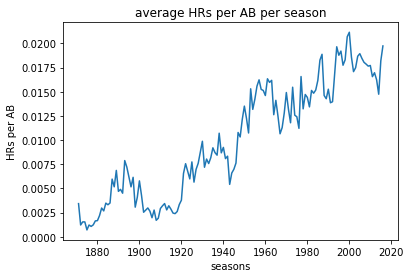

In [53]:
plt.plot(bt27a['yearID'].values,bt27a['HRs per AB'].values)
plt.axes().set(xlabel='seasons',ylabel='HRs per AB',title='average HRs per AB per season')